<a href="https://colab.research.google.com/github/EverettHelm/Hughes-Research-Group/blob/main/UGAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics and Programming Assignment

This assignment is the second assignment given to undergraduate students who are joining Dr. Hughes group.

The assignment is broken into four (4) subparts seperated by letters as follows:

## Part A:
Generate N samples drawn within a reasonably wide range of x values from a p.d.f. that is clearly asymmetric (Poisson, lognormal, etc.). Define the p.d.f. yourself. Make sure the function is normalized to unit area. Make a histogram of one example of a large number N samples drawn from your p.d.f. with reasonable bin widths and ranges to see the features in the distribution.

In [6]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the probability mass function (pmfun) of choice (Poisson equation: (lambda^y * e^-lambda)/y!)
def poisson_pmfun(y, lam):
  return (lam**y * np.exp(-lam))/(np.factoral(y))

# Creates the data points of a poisson data set
def generate_poisson_samples(N, lam):
  # Array to store values & decay factor
  vals = []
  decay_factor = np.exp(-lam)

  for i in range(N):
    prob = 1
    iteration = 0
    while prob > decay_factor:
      iteration = iteration + 1
      prob = prob * random.uniform(0, 1)
    vals.append(iteration - 1)
  return vals

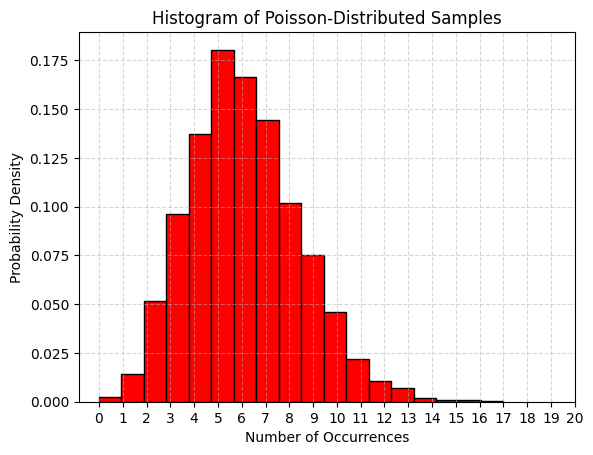

In [120]:
N = 5000  # Number of samples
lambda_value = 6  # Expected number of events
samples = generate_poisson_samples(N, lambda_value)


# Plot histogram to visualize distribution
plt.hist(samples, bins=18, density=True, edgecolor='black', color='red')
plt.gca().set_xticks(np.arange(0, 21, 1))
plt.xlabel("Number of Occurrences")
plt.ylabel("Probability Density")
plt.title("Histogram of Poisson-Distributed Samples")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

## Part B:

Repeat many times to obtain many sets of samples from your PDF and
 report the distribution of the mean of each set of samples. (Make a
 histogram of the distribution of the mean of each set of samples, and
 calculate the mean and variance of that distribution).

In [161]:
# Create empty list for variables to be stored
means = []
# Define the amount of data sets that will be made
loops = 1000

# Loop through all the data sets and add the means to the list
for i in range(loops):
  samples = generate_poisson_samples(N, lambda_value)
  means.append(np.mean(samples))

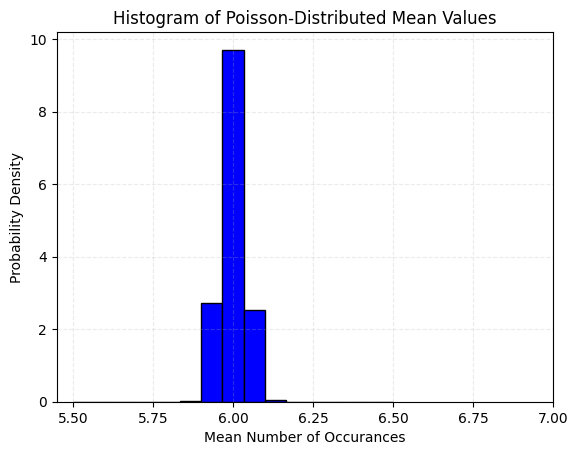

In [137]:
# Plot histogram to visualize distribution
plt.hist(means, bins=15, range=(5.5, 6.5), density=True, edgecolor='black', color='blue')
plt.gca().set_xticks(np.arange(5.5, 7.25, .25))
plt.xlabel("Mean Number of Occurances")
plt.ylabel("Probability Density")
plt.title("Histogram of Poisson-Distributed Mean Values")
plt.grid(True, linestyle="--", alpha=0.25)
plt.show()

In [141]:
# Calculate the mean of the combined data set
mean_calc = np.mean(means)
print(f" The mean of the combined data set is: {mean_calc}")

 The mean of the combined data set is: 5.9997381999999995


In [142]:
# Functionize the variance calculation
def variance_calc(data):
  mean = np.mean(data)
  variance = np.mean((data - mean)**2)
  return variance

# Run the function and print out the result of combined data
variance = variance_calc(means)
print(f" The variance of the combined data sets is: {variance}")

 The variance of the combined data sets is: 0.0012750618207599998


## Part C:

 Show that the variance of the mean behaves as expected as the sample size
 (N) is increased. (Repeat (b) for many values of N).

In [174]:
# Create empty lists for variables to be stored
group_means = []
var_vals = []

# Define different test sizes
loops = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

# Loop through all the data sets and add the means to the list
N = 5000  # Number of samples
j = 0
for j in range(len(loops)):
  cluster_means = []
  k = loops[j]
  for i in range(k):
    samples = generate_poisson_samples(N, lambda_value)
    cluster_means.append(np.mean(samples))
  var_vals.append(variance_calc(cluster_means))
  group_means.append(np.mean(cluster_means))
print(group_means)
print(var_vals)

[np.float64(6.0232), np.float64(6.006600000000001), np.float64(6.004950000000001), np.float64(5.968525), np.float64(5.9825125), np.float64(6.0016), np.float64(5.9958875), np.float64(5.997075), np.float64(5.9981984375), np.float64(6.003710546875), np.float64(5.999621484375)]
[np.float64(0.0), np.float64(0.00024964000000000117), np.float64(0.00018654750000000206), np.float64(0.0009963393750000082), np.float64(0.00121172984375), np.float64(0.001234069999999999), np.float64(0.0010982498437499958), np.float64(0.0011986824999999995), np.float64(0.0012300918725585927), np.float64(0.001140228170013427), np.float64(0.0012149419602966315)]


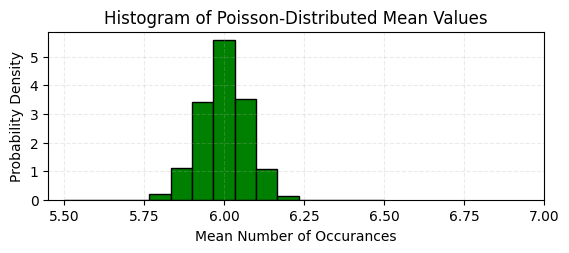

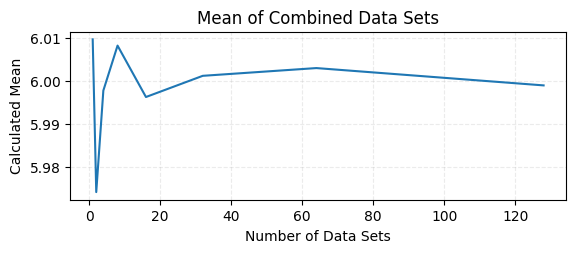

In [173]:
# Plot histogram to visualize distribution
plt.subplot(2, 1, 1)
plt.hist(means, bins=15, range=(5.5, 6.5), density=True, edgecolor='black', color='green')
plt.gca().set_xticks(np.arange(5.5, 7.25, .25))
plt.xlabel("Mean Number of Occurances")
plt.ylabel("Probability Density")
plt.title("Histogram of Poisson-Distributed Mean Values")
plt.grid(True, linestyle="--", alpha=0.25)
plt.show()

# Demonstrate the convergence of the mean
plt.subplot(2, 1, 2)
xaxis = loops[:8]
yaxis = group_means[:8]
plt.plot(xaxis, yaxis)
plt.xlabel("Number of Data Sets")
plt.ylabel("Calculated Mean")
plt.title("Mean of Combined Data Sets")
plt.grid(True, linestyle="--", alpha=0.25)
plt.show()

## Part D:

Choose a measure of non-Gaussianity (e.g. the value of an odd moment
 (skewness for example) or the fraction of samples higher than 3 standard
 deviations from the mean) and show how rapidly the distribution in the
 mean approaches a Gaussian (Central Limit Theorem). How big does N have
 to be for your input p.d.f before the distribution in the mean approaches a
 Gaussian

In [65]:
'''
This code is from part A of the assignment.
'''
import numpy as np
import random

# Creates the data points of a poisson data set
def generate_poisson_samples(N, lam):
  # Array to store values & decay factor
  vals = []
  decay_factor = np.exp(-lam)

  for i in range(N):
    prob = 1
    iteration = 0
    while prob > decay_factor:
      iteration = iteration + 1
      prob = prob * random.uniform(0, 1)
    vals.append(iteration - 1)
  return vals

In [66]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Define initial variables
lambda_value = 6
data_points = 1000
trials = [1, 5, 20, 50, 100, 200]

# Create list to store values
mean_distributions = {}

# Create data points
for i in trials:
  trial_mean = [float(np.mean(generate_poisson_samples(i, lambda_value))) for j in range(data_points)]
  mean_distributions[i] = trial_mean

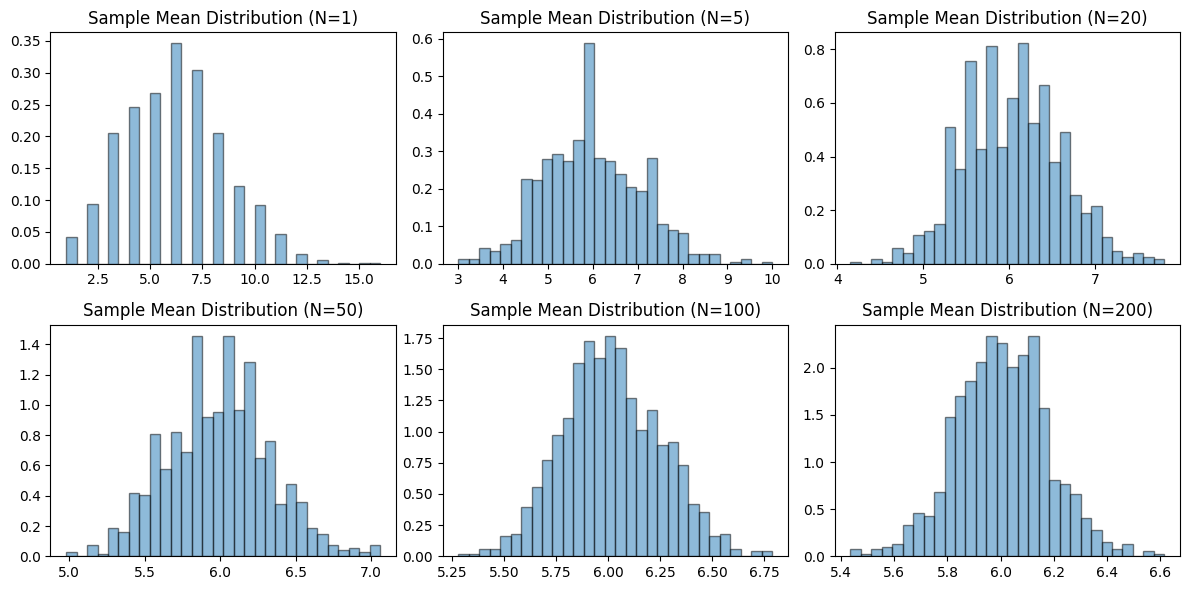

In [67]:
# Create Plots to visualize the data
fig, axes = plt.subplots(2, 3, figsize=(12, 6)) # Creates 2x3 grid for plots


for i, j in enumerate(trials):
  row = i // 3 # Row index
  col = i % 3 # Column index
  ax = axes[row, col] # Specify subplot
  ax.hist(mean_distributions[j], bins=30, density=True, alpha=0.5, edgecolor='black')
  ax.set_title(f"Sample Mean Distribution (N={j})")

plt.tight_layout()
plt.show()

In [77]:
# Statistical analysis functions
'''
  To demostrate knowledge of how these functions work they have been self defined,
  however in a practical application a pre-made (and more efficent or accurate)
  function could be used
'''

def calc_skew(data):
    '''
    Calculates skew by using the Fisher-Pearson Standardized equation instead of
    using a pre-defined function.

    Inputs:
      data: NumPy list or array that contains data (1 dimensional)

    Outputs:
      skewness of the data
    '''

    n = len(data)
    mean = np.mean(data)

    # Calculate the varience and average cubed difference from the mean (otherwise called central moments)
    varience = np.sum((data - mean)**2)/ n
    mean_diff = np.sum((data - mean)**3) / n

    # Calculate adjusted skewness
    skewness = (np.sqrt(n * (n - 1)) / (n - 2)) * (mean_diff / varience**(3/2))

    return skewness

def k_s_norm_test(data):
    '''
    Calculates normality of a data set using the kolmogorov-smirnov test

    Inputs:
      data: NumPy list or array that contains data (1 dimensional)

    Outputs:
      p-value of the test
    '''
    import scipy.stats as stats
    # Calculate the mean and std
    mean = np.mean(data)
    std = np.std(data)

    n = len(data)
    sorted_data = np.sort(data)

    # Calculate empirical & ideal CDF
    emp_cdf = np.arange(1, n + 1) / n
    id_cdf = stats.norm.cdf(sorted_data, loc=mean, scale=std)

    # Calculate D statistic
    d_plus = np.max(emp_cdf - id_cdf)
    d_minus = np.max(id_cdf - emp_cdf + 1/n) # 1/n corrects negative differences
    ks_stat = np.max(np.array([d_plus, d_minus], dtype=float)) # Changes type to float

    # Approximate p-value (for simplicity approximaitng is easier than fully solving)
    p_value = np.exp(-2 * (ks_stat**2) * n)

    return p_value

In [101]:
# Use the self-defined functions for the data
# Redefine variables
lambda_value = 6
# List to store p values
p_value = {}

# Re-define data_points to demonstrate behaviors
for i in range(len(trials)):
    data_points = generate_poisson_samples(trials[i], lambda_value)
    calc_p_value = k_s_norm_test(data_points)
    p_value[i] = calc_p_value

    print(f"N = {trials[i]}, P-value is: {p_value[i]}")
print(f"To meet the .05 certainty a N value of > ~100 is needed")

N = 1, P-value is: nan
N = 5, P-value is: 0.6049985170831798
N = 20, P-value is: 0.39274046777241745
N = 50, P-value is: 0.047843924039849606
N = 100, P-value is: 0.028896093668198945
N = 200, P-value is: 0.012889444315574853
To meet the .05 certainty a N value of > ~100 is needed
